# Loan Approval Prediction Dataset

## 대회 소개
    
- **Task**: 이 대회의 취지는 대출 신청자가 승인되는지를 예측하는 분류기 모델을 만드는 것
- **Evaluation**: 제출은 정해진 평가지표에 따라 판정됨

# 한글폰트

In [2]:
import matplotlib.font_manager as fm
', '.join(sorted([font.name for font in fm.fontManager.ttflist]))

'Agency FB, Agency FB, Algerian, Ami R, Arial, Arial, Arial, Arial, Arial, Arial, Arial, Arial, Arial, Arial Rounded MT Bold, Bahnschrift, Baskerville Old Face, Batang, Bauhaus 93, Bell MT, Bell MT, Bell MT, Berlin Sans FB, Berlin Sans FB, Berlin Sans FB Demi, Bernard MT Condensed, Blackadder ITC, Bodoni MT, Bodoni MT, Bodoni MT, Bodoni MT, Bodoni MT, Bodoni MT, Bodoni MT, Bodoni MT, Bodoni MT, Bodoni MT, Bodoni MT, Book Antiqua, Book Antiqua, Book Antiqua, Book Antiqua, Bookman Old Style, Bookman Old Style, Bookman Old Style, Bookman Old Style, Bookshelf Symbol 7, Bradley Hand ITC, Britannic Bold, Broadway, Brush Script MT, Calibri, Calibri, Calibri, Calibri, Calibri, Calibri, Californian FB, Californian FB, Californian FB, Calisto MT, Calisto MT, Calisto MT, Calisto MT, Cambria, Cambria, Cambria, Cambria, Candara, Candara, Candara, Candara, Candara, Candara, Castellar, Centaur, Century, Century Gothic, Century Gothic, Century Gothic, Century Gothic, Century Schoolbook, Century School

In [3]:
!pwd

'pwd'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [5]:
import matplotlib.pyplot as plt
import matplotlib

fontpaths = "/kaggle/input/nanumfontsetup-ttf-square"
font_files = fm.findSystemFonts(fontpaths = fontpaths, fontext='ttf')
for font_file in font_files:
    fm.fontManager.addfont(font_file)

font_name = fm.FontProperties(fname=font_files[0]).get_name()
matplotlib.rc('font', family=font_name)
print("font family: ", plt.rcParams['font.family'])

IndexError: list index out of range

In [4]:
fontpaths = "/kaggle/input/nanumfontsetup-ttf-square"
font_files = fm.findSystemFonts(fontpaths = fontpaths, fontext='ttf')
print(font_files)

['/kaggle/input/nanumfontsetup-ttf-square/NanumSquareL.ttf', '/kaggle/input/nanumfontsetup-ttf-square/NanumSquare_acL.ttf', '/kaggle/input/nanumfontsetup-ttf-square/NanumSquareR.ttf', '/kaggle/input/nanumfontsetup-ttf-square/NanumSquareB.ttf', '/kaggle/input/nanumfontsetup-ttf-square/NanumSquareEB.ttf', '/kaggle/input/nanumfontsetup-ttf-square/NanumSquare_acB.ttf', '/kaggle/input/nanumfontsetup-ttf-square/NanumSquare_acEB.ttf', '/kaggle/input/nanumfontsetup-ttf-square/NanumSquare_acR.ttf']


- 테스트

['NanumSquare'] 10.0


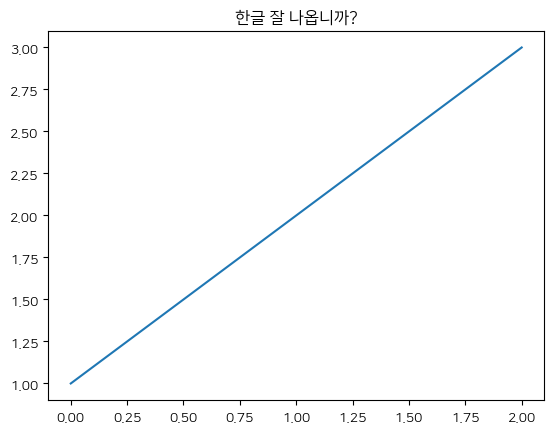

In [5]:
import matplotlib.pyplot as plt
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# 탐색적 자료분석을 위한 라이브러리 불러오기
- scikit-learn : 간단 설명
- numpy : 간단 설명
- pandas : 간단 설명
- matplotlib : 간단 설명
- seaborn : 간단 설명


In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly 
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy
from scipy.stats import levene, shapiro, ttest_ind
import statsmodels

print(f"pandas version : {pd.__version__}")
print(f"numpy version : {np.__version__}")
print(f"seaborn version : {sns.__version__}")
print(f"plotly version : {plotly.__version__}")
print(f"mpl version : {mpl.__version__}")
print(f"scipy version : {scipy.__version__}")
print(f"statsmodels version : {statsmodels.__version__}")

pandas version : 2.2.3
numpy version : 1.26.4
seaborn version : 0.12.2
plotly version : 5.22.0
mpl version : 3.7.5
scipy version : 1.14.1
statsmodels version : 0.14.2


# 데이터 불러오기

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nanumfontsetup-ttf-square/NanumSquareB.ttf
/kaggle/input/nanumfontsetup-ttf-square/NanumSquareL.ttf
/kaggle/input/nanumfontsetup-ttf-square/NanumSquare_acB.ttf
/kaggle/input/nanumfontsetup-ttf-square/NanumSquare_acL.ttf
/kaggle/input/nanumfontsetup-ttf-square/NanumSquareEB.ttf
/kaggle/input/nanumfontsetup-ttf-square/NanumSquareR.ttf
/kaggle/input/nanumfontsetup-ttf-square/NanumSquare_acEB.ttf
/kaggle/input/nanumfontsetup-ttf-square/NanumSquare_acR.ttf
/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


- 데이터 경로 파악해서 데이터를 가져오도록 한다. 

In [8]:
train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test  = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

In [9]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [10]:
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [11]:
submission.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


# 데이터 가공

## 컬럼 ID 제공
- 컬럼 ID 삭제

In [12]:
# 삭제 전 ID 저장
train_idx = train['id']
test_idx = test['id']

train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

train.shape, test.shape

((58645, 12), (39098, 11))

## 데이터 결측치 확인
- 데이터 결측치 확인결과 모두 없음

In [13]:
train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [14]:
test.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Load 성격의 차이
- Secured Loan : Low Risk
    + 대출자가 대출 납부 미 이행시, 대출 기관이 대출자의 자산 압류 등 행사
    + 서류가 많음
    + 대출금액 많음
    + 대출예시 : 자동차, 부동산 대출 등
- Unsecured Loan : High Risk
    + 대출자가 대출 납부 미 이행시, 신용점수에 악영향
    + 서류가 적음
    + 대출금액 적음
    + 대출예시 : 신용대출, 카드론 등

# 탐색적 자료 분석

## 범주형 변수간의 상관분석 
- Sample Code

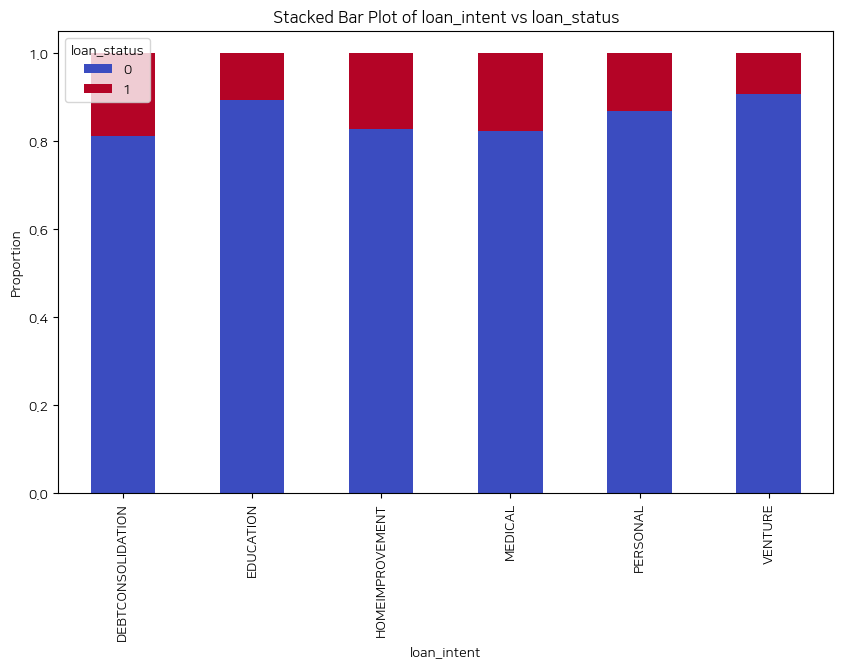

In [15]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(train, 'loan_intent')

### matplotlib & seaborn, scipy 모듈 사용
- 코드 업데이트

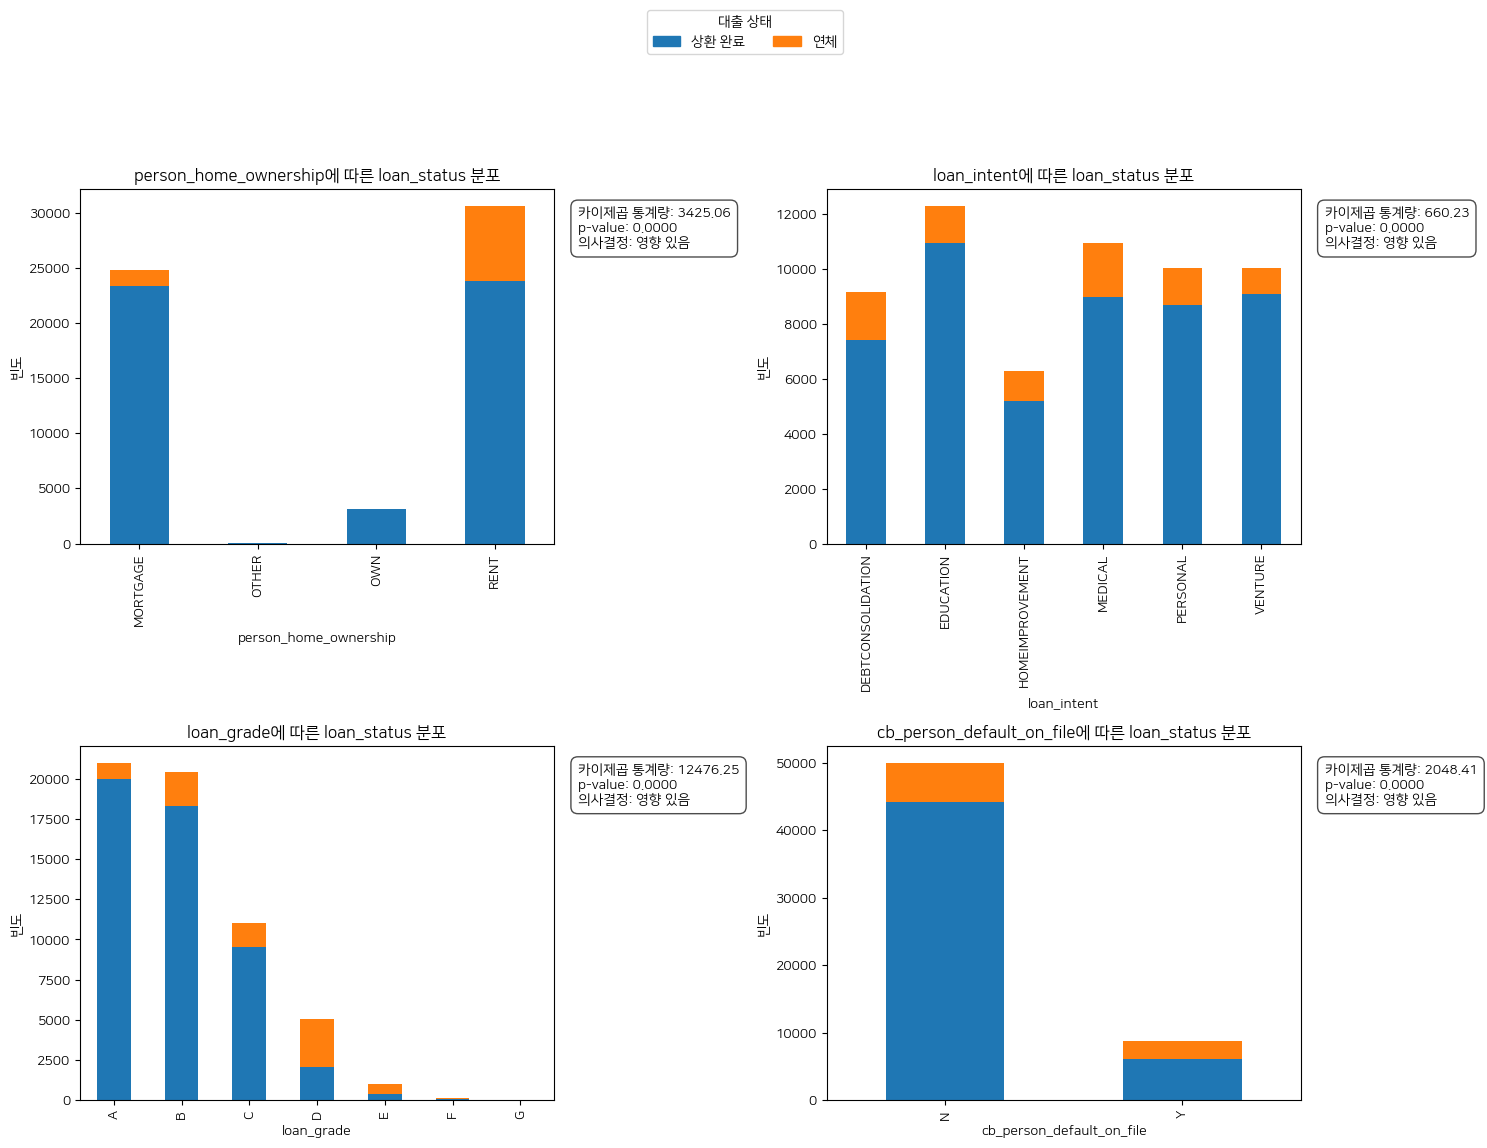

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# 카이제곱 검정 및 시각화 함수
def chi_square_analysis_and_visualization(data, categorical_vars, target_var, significance_level=0.05):
    results = []
    n_vars = len(categorical_vars)
    
    # 2차원 배열 형태로 subplot 생성 (최소한 2행 구조로)
    n_cols = 3 if n_vars > 4 else 2
    n_rows = int(np.ceil(n_vars / n_cols))
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axs = axs.ravel()  # 축을 평탄화하여 접근 가능하게 만들기

    # 수동으로 범례 항목 설정
    legend_elements = [Patch(facecolor='C0', edgecolor='C0', label='상환 완료'),
                       Patch(facecolor='C1', edgecolor='C1', label='연체')]

    # 상단에 공통 범례 생성, ncol을 사용하여 가로 배치
    fig.legend(handles=legend_elements, title="대출 상태", loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

    for i, var in enumerate(categorical_vars):
        # 범주형 변수와 target 변수로 교차표 생성
        contingency_table = pd.crosstab(data[var], data[target_var])
        
        # 카이제곱 검정 수행
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # 의사결정: p-value가 유의수준보다 작으면 영향 있음
        decision = '영향 있음' if p < significance_level else '영향 없음'
        ml_suitability = '사용 가능' if p < significance_level else '사용 불가'
        
        # 결과 저장
        results.append({
            '변수': var,
            '카이제곱 통계량': chi2,
            'p-value': p,
            '자유도': dof,
            '의사결정': decision,
            'ML 변수 사용 여부': ml_suitability
        })
        
        # 시각화: Stacked Bar Chart (범례 없이)
        contingency_table.columns = ['상환 완료', '연체']  # 범례용 한글 구분
        contingency_table.plot(kind='bar', stacked=True, ax=axs[i], legend=False)
        axs[i].set_title(f'{var}에 따른 {target_var} 분포')
        axs[i].set_xlabel(var)
        axs[i].set_ylabel('빈도')

        # 텍스트 주석을 그래프 외부에 추가 (범례 위치로)
        textstr = f'카이제곱 통계량: {chi2:.2f}\np-value: {p:.4f}\n의사결정: {decision}'
        props = dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white', alpha=0.7)
        
        # 텍스트 주석을 그래프 외부 오른쪽에 위치 (범례 위치)
        axs[i].text(1.05, 0.95, textstr, transform=axs[i].transAxes, fontsize=10,
                    verticalalignment='top', bbox=props)
    
    # 남는 subplot 비우기 (데이터보다 서브플롯이 많을 경우)
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # subplots_adjust 사용하여 상단과 그래프 간격 조정
    plt.tight_layout()
    # plt.tight_layout() 제거 후, subplots_adjust로 간격 조정
    return pd.DataFrame(results)

# 범주형 변수 리스트 생성 (loan_status를 제외하고 범주형 변수 찾기)
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# 함수 실행 및 결과 반환
chi_square_results_df = chi_square_analysis_and_visualization(train, categorical_columns, 'loan_status')

### plotly, scipy 모듈 사용

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

def chi_square_analysis_and_visualization_plotly(data, categorical_vars, target_var, significance_level=0.05):
    results = []
    n_vars = len(categorical_vars)
    
    # Plotly의 subplot을 사용하여 그래프 배열 생성
    n_cols = 3 if n_vars > 4 else 2
    n_rows = int(np.ceil(n_vars / n_cols))
    fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f'{var}에 따른 {target_var} 분포' for var in categorical_vars])

    for i, var in enumerate(categorical_vars):
        # 범주형 변수와 target 변수로 교차표 생성
        contingency_table = pd.crosstab(data[var], data[target_var])
        
        # 카이제곱 검정 수행
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # 의사결정
        decision = '영향 있음' if p < significance_level else '영향 없음'
        
        # 결과 저장
        results.append({
            '변수': var,
            '카이제곱 통계량': chi2,
            'p-value': p,
            '자유도': dof,
            '의사결정': decision
        })
        
        # 시각화
        fig.add_trace(go.Bar(
            x=contingency_table.index,
            y=contingency_table[0],
            name=f'{var} 값 0 (상환 완료)',
            marker=dict(color='blue'),
            hovertemplate=f'<b>{var} (상환 완료)</b><br>카이제곱 통계량: {chi2:.2f}<br>p-value: {p:.4f}<br>의사결정: {decision}<extra></extra>'
        ), row=(i // n_cols) + 1, col=(i % n_cols) + 1)
        
        fig.add_trace(go.Bar(
            x=contingency_table.index,
            y=contingency_table[1],
            name=f'{var} 값 1 (연체)',
            marker=dict(color='orange'),
            hovertemplate=f'<b>{var} (연체)</b><br>카이제곱 통계량: {chi2:.2f}<br>p-value: {p:.4f}<br>의사결정: {decision}<extra></extra>'
        ), row=(i // n_cols) + 1, col=(i % n_cols) + 1)

    # 레이아웃 설정 및 범례 제거
    fig.update_layout(
        height=n_rows * 400,
        title_text="카이제곱 검정 및 변수별 분포",
        title_x=0.5,
        barmode='stack',
        showlegend=False,
        margin=dict(t=100)  # 타이틀과 그래프 간격 조정
    )
    
    # 결과를 DataFrame으로 반환
    results_df = pd.DataFrame(results)
    return results_df, fig

# 범주형 변수 리스트 생성
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# 함수 실행 및 결과 반환
chi_square_results_df, fig = chi_square_analysis_and_visualization_plotly(train, categorical_columns, 'loan_status')

# Plotly 그래프 출력
fig.show()

## 박스플롯, 두 그룹간의 차이 검정
- sample code

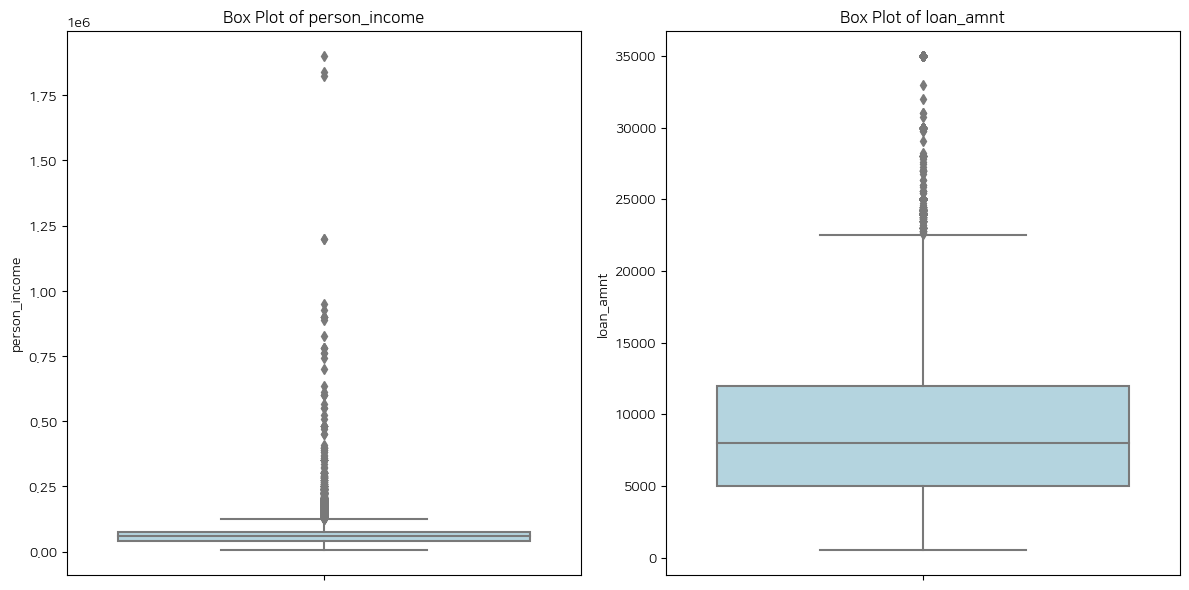

In [18]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(train, ['person_income', 'loan_amnt'])

- 코드 업데이트

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50295.

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8350.

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50295.

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8350.

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50295.

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: 

,변수,대출 상태,평균,중앙값,표준편차,t-통계량,p-value,정규성 검정,레빈 검정,변수 사용 여부,사용 불가 이유
0,person_age,상환 완료,27.553634,26.0,5.980022,0.262207,7.931671e-01,정규성 만족 (중심극한정리 적용),분산 동질성 불만족,사용 불가,p-value가 유의수준보다 커서 그룹 간 차이가 통계적으로 유의미하지 않음.
1,person_age,연체,27.534132,26.0,6.344539,0.262207,7.931671e-01,정규성 만족 (중심극한정리 적용),분산 동질성 불만족,사용 불가,p-value가 유의수준보다 커서 그룹 간 차이가 통계적으로 유의미하지 않음.
2,person_income,상환 완료,66672.867720,60000.0,39314.378848,61.150631,0.000000e+00,정규성 만족 (중심극한정리 적용),분산 동질성 불만족,사용 가능,사용 가능 이유: p-value가 유의수준보다 작아 그룹 간 차이가 통계적으로 유의미함.
3,person_income,연체,48224.661796,44000.0,22435.665380,61.150631,0.000000e+00,정규성 만족 (중심극한정리 적용),분산 동질성 불만족,사용 가능,사용 가능 이유: p-value가 유의수준보다 작아 그룹 간 차이가 통계적으로 유의미함.
4,loan_amnt,상환 완료,8888.883229,8000.0,5328.359771,-30.916191,8.705298e-201,정규성 만족 (중심극한정리 적용),분산 동질성 불만족,사용 가능,사용 가능 이유: p-value가 유의수준보다 작아 그룹 간 차이가 통계적으로 유의미함.
5,loan_amnt,연체,11197.271856,10000.0,6468.214784,-30.916191,8.705298e-201,정규성 만족 (중심극한정리 적용),분산 동질성 불만족,사용 가능,사용 가능 이유: p-value가 유의수준보다 작아 그룹 간 차이가 통계적으로 유의미함.


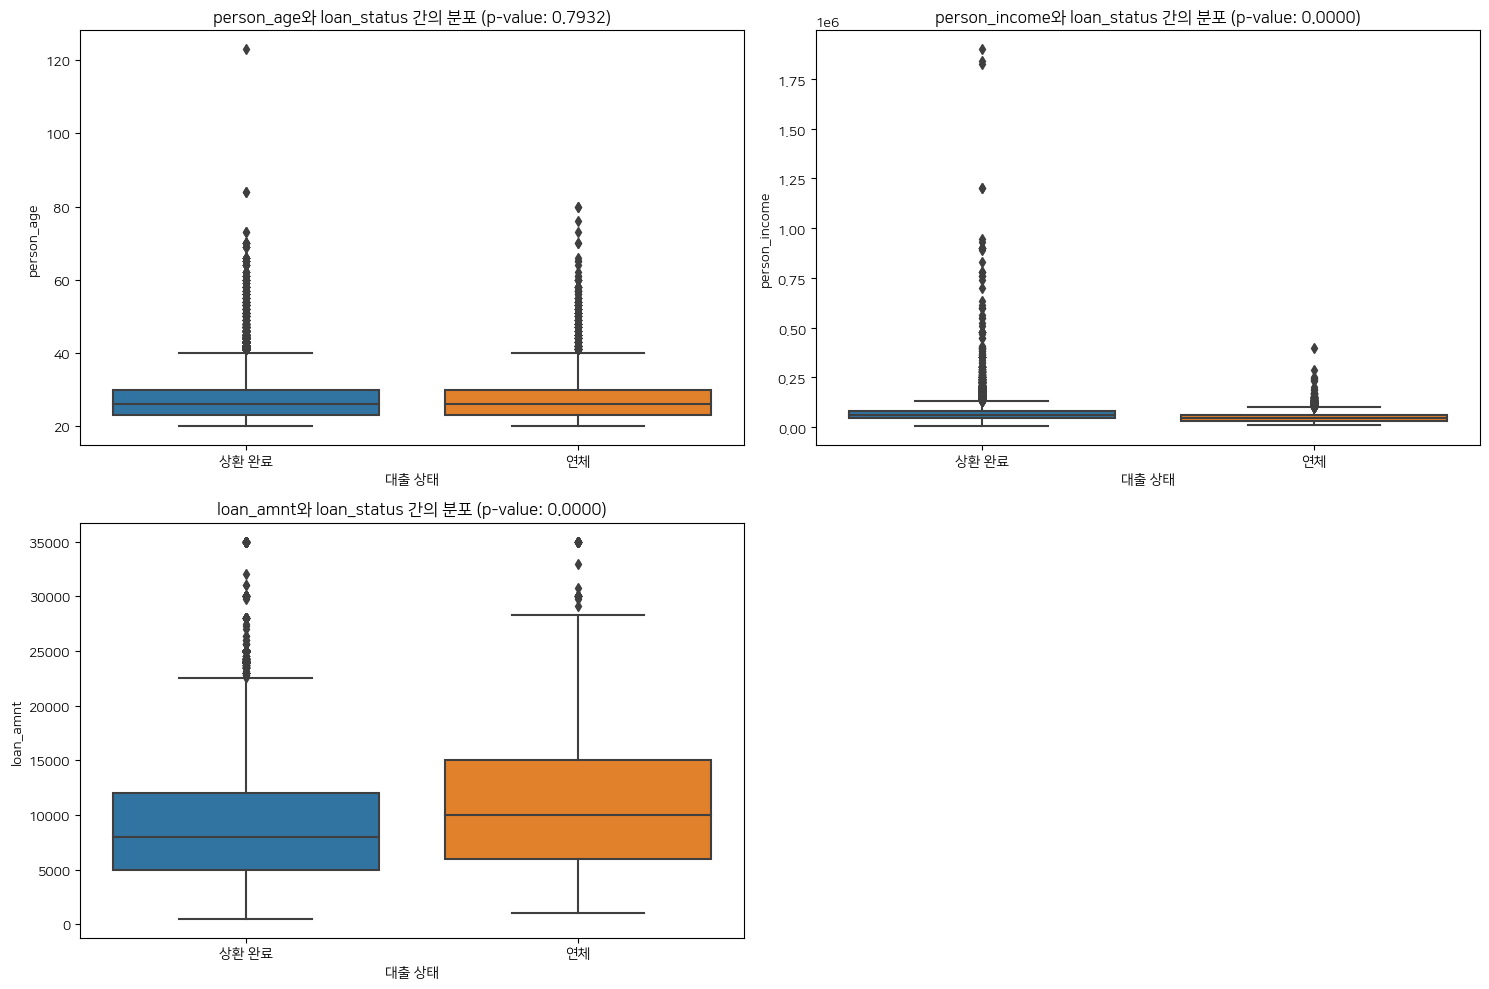

In [19]:
# 모수 통계, t-검정, 정규성 검정 및 레빈 검정 결과 요약 + 이유 설명 수정
def parametric_stats_with_reason(data, continuous_vars, target_var, significance_level=0.05):
    results = []
    
    # 컬럼 개수에 맞춰 2차원 배열로 subplot 생성
    n_vars = len(continuous_vars)
    n_cols = 3 if n_vars > 4 else 2
    n_rows = int(np.ceil(n_vars / n_cols))
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axs = axs.ravel()  # 축을 평탄화하여 접근 가능하게 만들기
    
    for i, var in enumerate(continuous_vars):
        # loan_status별로 모수 통계(평균, 중앙값, 표준편차) 계산
        summary_stats = data.groupby(target_var)[var].agg(['mean', 'median', 'std']).reset_index()
        
        # 각 그룹 데이터
        group1 = data[data[target_var] == 0][var]  # 상환 완료
        group2 = data[data[target_var] == 1][var]  # 연체

        # 정규성 검정 (Shapiro-Wilk test) - 중심극한정리에 의해 데이터가 크면 정규분포로 처리
        shapiro_stat1, shapiro_p1 = shapiro(group1)
        shapiro_stat2, shapiro_p2 = shapiro(group2)
        normality_message = "정규성 만족 (중심극한정리 적용)" if len(group1) > 30 and len(group2) > 30 else "정규성 불만족"
        
        # 레빈 검정 (분산 동질성 검정)
        levene_stat, levene_p = levene(group1, group2)
        levene_message = "분산 동질성 만족" if levene_p > significance_level else "분산 동질성 불만족"
        
        # t-검정: 분산 동질성 여부에 따라 equal_var 값 설정
        equal_var = True if levene_p > significance_level else False
        t_stat, p_val = ttest_ind(group1, group2, equal_var=equal_var)
        
        # 변수 사용 여부 판단 및 이유 설명
        if p_val < significance_level:
            decision = '사용 가능'
            reason = "p-value가 유의수준보다 작아 그룹 간 차이가 통계적으로 유의미함."
        else:
            decision = '사용 불가'
            reason = "p-value가 유의수준보다 커서 그룹 간 차이가 통계적으로 유의미하지 않음."
        
        # 결과 저장 (대출 상태별 통계와 t-검정, 정규성 검정, 레빈 검정 결과)
        for _, row in summary_stats.iterrows():
            results.append({
                '변수': var,
                '대출 상태': '상환 완료' if row[target_var] == 0 else '연체',
                '평균': row['mean'],
                '중앙값': row['median'],
                '표준편차': row['std'],
                't-통계량': t_stat,
                'p-value': p_val,
                '정규성 검정': normality_message,
                '레빈 검정': levene_message,
                '변수 사용 여부': decision,
                '사용 불가 이유': reason if decision == '사용 불가' else '사용 가능 이유: ' + reason
            })
        
        # 시각화: 박스플롯으로 각 연속형 변수의 대출 상태별 분포를 그림
        sns.boxplot(x=target_var, y=var, data=data, ax=axs[i])
        axs[i].set_title(f'{var}와 {target_var} 간의 분포 (p-value: {p_val:.4f})')
        axs[i].set_xlabel('대출 상태')
        axs[i].set_ylabel(var)
        axs[i].set_xticklabels(['상환 완료', '연체'])
    
    # 남는 subplot 비우기 (데이터보다 서브플롯이 많을 경우)
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    
    # 결과를 DataFrame으로 반환
    results_df = pd.DataFrame(results)
    return results_df

# 연속형 변수 리스트 생성
continuous_columns = ['person_age', 'person_income', 'loan_amnt']

# 함수 실행 및 결과 반환
parametric_stats_with_reason_df = parametric_stats_with_reason(train, continuous_columns, 'loan_status')
parametric_stats_with_reason_df

## 